In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pathlib import Path

# check if workding_dir is in local variables
if "workding_dir" not in locals():
    workding_dir = str(Path.cwd().parent)

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/papers/rapget-translation


In [3]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/papers/rapget-translation/.env


True

In [4]:
import os

model_name = os.getenv("MODEL_NAME")
adapter_name_or_path = os.getenv("ADAPTER_NAME_OR_PATH")
load_in_4bit = os.getenv("LOAD_IN_4BIT") == "true"
data_path = os.getenv("DATA_PATH")
results_path = "results/mac-results_fine_tuned.csv"  # os.getenv("RESULTS_PATH")
use_english_datasets = os.getenv("USE_ENGLISH_DATASETS") == "true"
max_new_tokens = int(os.getenv("MAX_NEW_TOKENS", 2048))

print(model_name, adapter_name_or_path, load_in_4bit, data_path, results_path, use_english_datasets, max_new_tokens)

Qwen/Qwen2-7B-Instruct None False datasets/mac/mac.tsv results/mac-results_fine_tuned.csv False 2048


In [5]:
import pandas as pd
from llm_toolkit.llm_utils import *
from llm_toolkit.translation_utils import *

df = pd.read_csv(results_path)
df.info()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


loading: /Users/inflaton/code/engd/papers/rapget-translation/eval_modules/calc_repetitions.py
loading /Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/inflaton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/inflaton/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 85 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   chinese                                                           1133 non-null   object
 1   english                                                           1133 non-null   object
 2   internlm/internlm2_5-7b-chat/epochs-01                            1133 non-null   object
 3   Qwen/Qwen2-7B-Instruct/epochs-01                                  1133 non-null   object
 4   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-01               1133 non-null   object
 5   shenzhi-wang/Llama3.1-8B-Chinese-Chat/epochs-01                   1133 non-null   object
 6   internlm/internlm2_5-7b-chat/epochs-02                            1133 non-null   object
 7   internlm/internlm2_5-7b-chat/epochs-03    

In [6]:
result_columns = [col for col in df.columns[2:].to_list() if "rpp" not in col and "shots" not in col]
result_columns.sort()
result_columns

['Qwen/Qwen2-72B-Instruct/epochs-01',
 'Qwen/Qwen2-72B-Instruct/epochs-02',
 'Qwen/Qwen2-72B-Instruct/epochs-03',
 'Qwen/Qwen2-72B-Instruct/epochs-04',
 'Qwen/Qwen2-72B-Instruct/epochs-05',
 'Qwen/Qwen2-72B-Instruct/epochs-06',
 'Qwen/Qwen2-7B-Instruct/epochs-01',
 'Qwen/Qwen2-7B-Instruct/epochs-02',
 'Qwen/Qwen2-7B-Instruct/epochs-03',
 'Qwen/Qwen2-7B-Instruct/epochs-04',
 'Qwen/Qwen2-7B-Instruct/epochs-05',
 'Qwen/Qwen2-7B-Instruct/epochs-06',
 'internlm/internlm2_5-7b-chat/epochs-01',
 'internlm/internlm2_5-7b-chat/epochs-02',
 'internlm/internlm2_5-7b-chat/epochs-03',
 'internlm/internlm2_5-7b-chat/epochs-04',
 'internlm/internlm2_5-7b-chat/epochs-05',
 'internlm/internlm2_5-7b-chat/epochs-06',
 'microsoft/Phi-3.5-mini-instruct/epochs-01',
 'microsoft/Phi-3.5-mini-instruct/epochs-02',
 'microsoft/Phi-3.5-mini-instruct/epochs-03',
 'microsoft/Phi-3.5-mini-instruct/epochs-04',
 'microsoft/Phi-3.5-mini-instruct/epochs-05',
 'microsoft/Phi-3.5-mini-instruct/epochs-06',
 'shenzhi-wang/L

In [7]:
df_openai = pd.read_csv("results/mac-results_few_shots_openai.csv")
df_openai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   chinese                1133 non-null   object
 1   english                1133 non-null   object
 2   gpt-4o-mini/shots-00   1133 non-null   object
 3   gpt-4o-mini/shots-01   1133 non-null   object
 4   gpt-4o-mini/shots-03   1133 non-null   object
 5   gpt-4o-mini/shots-05   1133 non-null   object
 6   gpt-4o-mini/shots-10   1133 non-null   object
 7   gpt-4o-mini/shots-50   1133 non-null   object
 8   gpt-4o/shots-00        1133 non-null   object
 9   gpt-4o/shots-01        1133 non-null   object
 10  gpt-4o/shots-03        1133 non-null   object
 11  gpt-4o/shots-05        1133 non-null   object
 12  gpt-4o/shots-10        1133 non-null   object
 13  gpt-4o/shots-50        1133 non-null   object
 14  gpt-4o-mini/epochs-01  1133 non-null   object
 15  gpt-4o-mini/epochs-02

In [8]:
openai_cols = df_openai.columns[2:].tolist()
openai_cols = [col for col in openai_cols if "epochs" in col]
openai_cols

['gpt-4o-mini/epochs-01',
 'gpt-4o-mini/epochs-02',
 'gpt-4o-mini/epochs-03',
 'gpt-4o-mini/epochs-04',
 'gpt-4o-mini/epochs-05',
 'gpt-4o-mini/epochs-06']

In [9]:
columns = df.columns[:2].to_list() + result_columns
df = df[columns]
df[openai_cols] = df_openai[openai_cols]
columns = df.columns.to_list()
result_columns = df.columns[2:].to_list()
result_columns, columns

(['Qwen/Qwen2-72B-Instruct/epochs-01',
  'Qwen/Qwen2-72B-Instruct/epochs-02',
  'Qwen/Qwen2-72B-Instruct/epochs-03',
  'Qwen/Qwen2-72B-Instruct/epochs-04',
  'Qwen/Qwen2-72B-Instruct/epochs-05',
  'Qwen/Qwen2-72B-Instruct/epochs-06',
  'Qwen/Qwen2-7B-Instruct/epochs-01',
  'Qwen/Qwen2-7B-Instruct/epochs-02',
  'Qwen/Qwen2-7B-Instruct/epochs-03',
  'Qwen/Qwen2-7B-Instruct/epochs-04',
  'Qwen/Qwen2-7B-Instruct/epochs-05',
  'Qwen/Qwen2-7B-Instruct/epochs-06',
  'internlm/internlm2_5-7b-chat/epochs-01',
  'internlm/internlm2_5-7b-chat/epochs-02',
  'internlm/internlm2_5-7b-chat/epochs-03',
  'internlm/internlm2_5-7b-chat/epochs-04',
  'internlm/internlm2_5-7b-chat/epochs-05',
  'internlm/internlm2_5-7b-chat/epochs-06',
  'microsoft/Phi-3.5-mini-instruct/epochs-01',
  'microsoft/Phi-3.5-mini-instruct/epochs-02',
  'microsoft/Phi-3.5-mini-instruct/epochs-03',
  'microsoft/Phi-3.5-mini-instruct/epochs-04',
  'microsoft/Phi-3.5-mini-instruct/epochs-05',
  'microsoft/Phi-3.5-mini-instruct/epoc

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 50 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   chinese                                              1133 non-null   object
 1   english                                              1133 non-null   object
 2   Qwen/Qwen2-72B-Instruct/epochs-01                    1133 non-null   object
 3   Qwen/Qwen2-72B-Instruct/epochs-02                    1133 non-null   object
 4   Qwen/Qwen2-72B-Instruct/epochs-03                    1133 non-null   object
 5   Qwen/Qwen2-72B-Instruct/epochs-04                    1133 non-null   object
 6   Qwen/Qwen2-72B-Instruct/epochs-05                    1133 non-null   object
 7   Qwen/Qwen2-72B-Instruct/epochs-06                    1133 non-null   object
 8   Qwen/Qwen2-7B-Instruct/epochs-01                     1133 non-null   object
 9

In [11]:
variant = "epochs"
metrics_df = get_metrics(df, max_output_tokens=max_new_tokens, variant=variant)
metrics_df

['Qwen/Qwen2-72B-Instruct' 'Qwen/Qwen2-7B-Instruct'
 'internlm/internlm2_5-7b-chat' 'microsoft/Phi-3.5-mini-instruct'
 'shenzhi-wang/Llama3.1-70B-Chinese-Chat'
 'shenzhi-wang/Llama3.1-8B-Chinese-Chat'
 'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat' 'gpt-4o-mini']
Qwen/Qwen2-72B-Instruct/epochs-01: {'meteor': 0.4689894616957893, 'sacrebleu': {'score': 18.065844028552757, 'counts': [14500, 6569, 3558, 2049], 'totals': [27672, 26539, 25408, 24278], 'precisions': [52.39953743856606, 24.75225140359471, 14.003463476070529, 8.43973968201664], 'bp': 0.9130227260435708, 'sys_len': 27672, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.18065844028552755, 'precisions': [0.5239953743856606, 0.2475225140359471, 0.1400346347607053, 0.0843973968201664], 'brevity_penalty': 0.9130227260435708, 'length_ratio': 0.9165948989731699, 'translation_length': 27672, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.5032766897887753, 'rouge2': 0.26083423405260786, 'rougeL': 0.4475962917769797, 'rougeLsum': 0.44

/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat/epochs-06: {'meteor': 0.3843671339870232, 'sacrebleu': {'score': 11.760109889558809, 'counts': [12442, 4511, 2075, 1073], 'totals': [29486, 28353, 27222, 26093], 'precisions': [42.19629654751407, 15.910132966529115, 7.622511204173096, 4.112214003755796], 'bp': 0.9764070328637859, 'sys_len': 29486, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11760109889558817, 'precisions': [0.4219629654751407, 0.15910132966529114, 0.07622511204173095, 0.041122140037557965], 'brevity_penalty': 0.9764070328637862, 'length_ratio': 0.9766810202053661, 'translation_length': 29486, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4090438819710813, 'rouge2': 0.17512800473307188, 'rougeL': 0.35217836060553437, 'rougeLsum': 0.35178655674754}, 'accuracy': 0.00706090026478376, 'correct_ids': [41, 133, 193, 240, 348, 419, 658, 1011]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-01: {'meteor': 0.3785370331806402, 'sacrebleu': {'score': 12.052844230027103, 'counts': [12818, 4623, 2153, 1081], 'totals': [29097, 27964, 26850, 25740], 'precisions': [44.05265147609719, 16.53196967529681, 8.018621973929237, 4.1996891996892], 'bp': 0.9631327655852462, 'sys_len': 29097, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12052844230027103, 'precisions': [0.44052651476097193, 0.1653196967529681, 0.08018621973929237, 0.041996891996891994], 'brevity_penalty': 0.9631327655852462, 'length_ratio': 0.9637959589267969, 'translation_length': 29097, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42443047851518106, 'rouge2': 0.17596493152766832, 'rougeL': 0.36957918240806564, 'rougeLsum': 0.36921849634755544}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:297: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df["english"].apply(
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

gpt-4o-mini/epochs-02: {'meteor': 0.3785921332515917, 'sacrebleu': {'score': 12.033706874864837, 'counts': [12801, 4628, 2150, 1076], 'totals': [29076, 27943, 26830, 25722], 'precisions': [44.02600082542303, 16.562287513867517, 8.013417815877748, 4.183189487598165], 'bp': 0.9624112877781842, 'sys_len': 29076, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.12033706874864836, 'precisions': [0.4402600082542303, 0.16562287513867516, 0.08013417815877749, 0.04183189487598165], 'brevity_penalty': 0.9624112877781842, 'length_ratio': 0.9631003643590593, 'translation_length': 29076, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42354000204099773, 'rouge2': 0.17594184965251966, 'rougeL': 0.3692226123830143, 'rougeLsum': 0.36897711811852274}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-03: {'meteor': 0.37736228106121694, 'sacrebleu': {'score': 11.933111335430906, 'counts': [12779, 4601, 2124, 1061], 'totals': [29096, 27963, 26848, 25737], 'precisions': [43.920126477866376, 16.453885491542394, 7.911203814064362, 4.122469596301046], 'bp': 0.9630984208616785, 'sys_len': 29096, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11933111335430906, 'precisions': [0.4392012647786637, 0.16453885491542394, 0.07911203814064362, 0.041224695963010455], 'brevity_penalty': 0.9630984208616785, 'length_ratio': 0.9637628353759523, 'translation_length': 29096, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42336961319155575, 'rouge2': 0.1748520032985133, 'rougeL': 0.3688450537487206, 'rougeLsum': 0.36846273163776855}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-04: {'meteor': 0.37818535038887346, 'sacrebleu': {'score': 11.933285526593995, 'counts': [12797, 4601, 2121, 1061], 'totals': [29110, 27977, 26861, 25749], 'precisions': [43.960838199931295, 16.445651785395146, 7.896206395889952, 4.120548370810517], 'bp': 0.9635791436286372, 'sys_len': 29110, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11933285526593994, 'precisions': [0.43960838199931296, 0.16445651785395146, 0.07896206395889951, 0.041205483708105166], 'brevity_penalty': 0.9635791436286371, 'length_ratio': 0.9642265650877774, 'translation_length': 29110, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.42366436952994724, 'rouge2': 0.17495883924544925, 'rougeL': 0.369312643768064, 'rougeLsum': 0.36901428642912754}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-05: {'meteor': 0.3790673551140706, 'sacrebleu': {'score': 11.955698498650582, 'counts': [12808, 4609, 2126, 1064], 'totals': [29209, 28076, 26959, 25846], 'precisions': [43.849498442260945, 16.416156147599374, 7.88604918580066, 4.116691170780778], 'bp': 0.9669721941455759, 'sys_len': 29209, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11955698498650584, 'precisions': [0.4384949844226095, 0.16416156147599373, 0.0788604918580066, 0.041166911707807785], 'brevity_penalty': 0.9669721941455759, 'length_ratio': 0.9675057966213978, 'translation_length': 29209, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.424511337578104, 'rouge2': 0.17552506937019113, 'rougeL': 0.3700516961573066, 'rougeLsum': 0.3697358220137848}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


gpt-4o-mini/epochs-06: {'meteor': 0.3792226866395673, 'sacrebleu': {'score': 11.982811850915233, 'counts': [12810, 4617, 2137, 1066], 'totals': [29116, 27983, 26868, 25757], 'precisions': [43.996428080780326, 16.499303148340065, 7.95369956825964, 4.138680746981403], 'bp': 0.9637850995333245, 'sys_len': 29116, 'ref_len': 30190}, 'bleu_scores': {'bleu': 0.11982811850915229, 'precisions': [0.43996428080780325, 0.16499303148340064, 0.0795369956825964, 0.04138680746981403], 'brevity_penalty': 0.9637850995333245, 'length_ratio': 0.9644253063928453, 'translation_length': 29116, 'reference_length': 30190}, 'rouge_scores': {'rouge1': 0.4249704250591366, 'rouge2': 0.17551181343561423, 'rougeL': 0.3702014855827334, 'rougeLsum': 0.369761700076006}, 'accuracy': 0.00088261253309797, 'correct_ids': [77]}


/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:302: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(contains_chinese)
/Users/inflaton/code/engd/papers/rapget-translation/llm_toolkit/translation_utils.py:306: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_col] = df[col].apply(lambda x: len(tokenizers[model](x)["input_ids"]))


model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
1                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
2                     Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
3                     Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
4                     Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
5                     Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
6                      Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
7                      Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
8                      Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
9                      Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
10                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
11                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
12               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
13               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
14               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
15               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
16               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
17               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
18            microsoft/Phi-3.5-mini-instruct       1  0.346101   9.405371   
19            microsoft/Phi-3.5-mini-instruct       2  0.356541  10.050233   
20            microsoft/Phi-3.5-mini-instruct       3  0.367523  10.688776   
21            microsoft/Phi-3.5-mini-instruct       4  0.378257  11.274744   
22            microsoft/Phi-3.5-mini-instruct       5  0.380318  11.472004   
23            microsoft/Phi-3.5-mini-instruct       6  0.381069  11.286091   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.377825  11.352361   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   
42                                gpt-4o-mini       1  0.378537  12.052844   
43                                gpt-4o-mini       2  0.378592  12.033707   
44                                gpt-4o-mini       3  0.377362  11.933111   
45                                gpt-4o-mini       4  0.378185  11.933286   
46                                gpt-4o-mini       5  0.379067  11.955698   
47                                gpt-4o-mini       6  0.379223  11.982812   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.180658  0.447596        0.0          0.040600           0.040600   
1   0.189790  0.451435        0.0          0.081200           0.08120

In [12]:
time_df = load_eval_times("logs", total_entries=len(df), variant=variant)
time_df

Loading content of logs/l40-1gpu-1.txt
Error processing log file: logs/l40-1gpu-1.txt
'utf-8' codec can't decode byte 0xe2 in position 0: unexpected end of data
Loading content of logs/l40-1gpu-2.txt
Loading content of logs/l40-1gpu-3.txt
Loading content of logs/l40-1gpu-epoch-1.txt
Loading content of logs/l40-1gpu-fine-tuned.txt
Loading content of logs/l40-1gpu-rpp-1.txt
Loading content of logs/l40-1gpu-rpp-2.txt
Loading content of logs/l40-1gpu-rpp-3.txt
Loading content of logs/l40-1gpu-rpp-4.txt
Loading content of logs/l40-4gpu-1.txt
Loading content of logs/l40-4gpu-2.txt
Loading content of logs/l40-4gpu-3.txt
Loading content of logs/l40-4gpu-4.txt
Loading content of logs/l40-4gpu-5.txt
Loading content of logs/l40-4gpu-6.txt
Loading content of logs/l40-4gpu-7.txt
Loading content of logs/l40-4gpu-8.txt
Loading content of logs/openai-gpt-4o-mini-fine-tuned.txt
Loading content of logs/openai-gpt-4o-mini.txt
Loading content of logs/openai-gpt-4o.txt
Loading content of logs/openai-traini

model  epochs  eval_time
0             microsoft/Phi-3.5-mini-instruct       1   1.702560
1             microsoft/Phi-3.5-mini-instruct       2   1.654016
2             microsoft/Phi-3.5-mini-instruct       3   1.641659
3             microsoft/Phi-3.5-mini-instruct       4   1.696381
4             microsoft/Phi-3.5-mini-instruct       5   1.696381
5             microsoft/Phi-3.5-mini-instruct       6   1.701677
6                internlm/internlm2_5-7b-chat       1   1.536628
10               internlm/internlm2_5-7b-chat       2   1.565755
11               internlm/internlm2_5-7b-chat       3   1.598411
12               internlm/internlm2_5-7b-chat       4   1.556929
13               internlm/internlm2_5-7b-chat       5   1.578111
14               internlm/internlm2_5-7b-chat       6   1.556046
15                     Qwen/Qwen2-7B-Instruct       1   1.173875
16                     Qwen/Qwen2-7B-Instruct       2   1.263019
17                     Qwen/Qwen2-7B-Instruct       3   1.269197
18                     Qwen/Qwen2-7B-Instruct       4   1.234775
19                     Qwen/Qwen2-7B-Instruct       5   1.262136
20                     Qwen/Qwen2-7B-Instruct       6   1.238305
21  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1   1.324801
22  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2   1.376876
23  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3   1.372462
24  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4   1.421006
25  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5   1.456311
26  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6   1.497793
27      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1   1.225949
28      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2   1.198588
29      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3   1.234775
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4   1.218888
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5   1.235658
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6   1.230362
33     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  15.308914
34     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  15.309797
35     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  16.096205
36     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  16.263019
37     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  16.224184
38     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  16.559576
39                    Qwen/Qwen2-72B-Instruct       1  15.127979
40                    Qwen/Qwen2-72B-Instruct       2  15.532215
41                    Qwen/Qwen2-72B-Instruct       3  15.616064
42                    Qwen/Qwen2-72B-Instruct       4  16.109444
43                    Qwen/Qwen2-72B-Instruct       5  16.624007
44                    Qwen/Qwen2-72B-Instruct       6  16.712268
45                                gpt-4o-mini       1   0.889673
46                                gpt-4o-mini       2   0.949691
47                                gpt-4o-mini       3   0.902030
48                                gpt-4o-mini       4   0.984113
49                                gpt-4o-mini       5   0.835834
50                                gpt-4o-mini       6   0.832304

In [13]:
# Merge time_df into metrics_df
metrics_df.drop(columns=["eval_time"], inplace=True, errors="ignore")
metrics_df = pd.merge(metrics_df, time_df, on=["model", variant], how="left")
metrics_df

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
1                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
2                     Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
3                     Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
4                     Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
5                     Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
6                      Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
7                      Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
8                      Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
9                      Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
10                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
11                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
12               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
13               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
14               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
15               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
16               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
17               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
18            microsoft/Phi-3.5-mini-instruct       1  0.346101   9.405371   
19            microsoft/Phi-3.5-mini-instruct       2  0.356541  10.050233   
20            microsoft/Phi-3.5-mini-instruct       3  0.367523  10.688776   
21            microsoft/Phi-3.5-mini-instruct       4  0.378257  11.274744   
22            microsoft/Phi-3.5-mini-instruct       5  0.380318  11.472004   
23            microsoft/Phi-3.5-mini-instruct       6  0.381069  11.286091   
24     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
25     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
26     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
27     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
28     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
29     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
30      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
31      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
32      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
33      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
34      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
35      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
36  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.377825  11.352361   
37  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
38  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
39  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
40  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
41  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   
42                                gpt-4o-mini       1  0.378537  12.052844   
43                                gpt-4o-mini       2  0.378592  12.033707   
44                                gpt-4o-mini       3  0.377362  11.933111   
45                                gpt-4o-mini       4  0.378185  11.933286   
46                                gpt-4o-mini       5  0.379067  11.955698   
47                                gpt-4o-mini       6  0.379223  11.982812   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.180658  0.447596        0.0          0.040600           0.040600   
1   0.189790  0.451435        0.0          0.081200           0.08120

In [14]:
models = metrics_df["model"].unique()
models

array(['Qwen/Qwen2-72B-Instruct', 'Qwen/Qwen2-7B-Instruct',
       'internlm/internlm2_5-7b-chat', 'microsoft/Phi-3.5-mini-instruct',
       'shenzhi-wang/Llama3.1-70B-Chinese-Chat',
       'shenzhi-wang/Llama3.1-8B-Chinese-Chat',
       'shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat', 'gpt-4o-mini'],
      dtype=object)

In [15]:
df_few_shots = pd.read_csv("results/mac-results_few_shots_metrics.csv")
df_few_shots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   model                        53 non-null     object 
 1   shots                        53 non-null     int64  
 2   meteor                       53 non-null     float64
 3   spbleu                       53 non-null     float64
 4   bleu_1                       53 non-null     float64
 5   rouge_l                      53 non-null     float64
 6   ews_score                    53 non-null     float64
 7   repetition_score             53 non-null     float64
 8   total_repetitions            53 non-null     float64
 9   rap                          53 non-null     float64
 10  num_incomplete_translations  53 non-null     int64  
 11  num_max_output_tokens        53 non-null     int64  
 12  eval_time                    51 non-null     float64
dtypes: float64(9), int64(3

In [16]:
temp = df_few_shots[df_few_shots["model"].isin(models)]
df_base = temp[temp["shots"] == 0].rename(columns={"shots": variant})
df_base

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       0  0.400364  12.223833   
6                      Qwen/Qwen2-7B-Instruct       0  0.377477  11.783493   
12               internlm/internlm2_5-7b-chat       0  0.368168  11.360521   
18     shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.363870  10.874678   
24      shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622   9.799439   
30  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500   8.313795   
36            microsoft/Phi-3.5-mini-instruct       0  0.288749   6.616686   
41                                gpt-4o-mini       0  0.379770  12.082384   

      bleu_1   rouge_l  ews_score  repetition_score  total_repetitions  \
0   0.122238  0.384692        0.0          0.195940           0.195940   
6   0.117835  0.367905        0.0          0.071492           0.071492   
12  0.113605  0.360267        0.0          0.214475           0.214475   
18  0.108747  0.353357        0.0          0.154457           0.154457   
24  0.097994  0.335269        0.0          2.216240           2.216240   
30  0.083138  0.317988        0.0          0.127979           0.127979   
36  0.066167  0.292031        0.0          0.135922           0.135922   
41  0.120824  0.370822        0.0          0.095322           0.095322   

         rap  num_incomplete_translations  num_max_output_tokens  eval_time  
0   0.397018                           37                      0   8.894969  
6   0.376313                           89                      0   0.980583  
12  0.364806                           10                      0   1.224184  
18  0.361464                           55                      0   7.833186  
24  0.319818                           16                      0   1.075022  
30  0.326695                           18                      0   1.204766  
36  0.287066                           17                      0   0.983230  
41  0.378211                           22                      0   1.593998

In [17]:
metrics_df = pd.concat([df_base, metrics_df], ignore_index=True)
metrics_df

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       0  0.400364  12.223833   
1                      Qwen/Qwen2-7B-Instruct       0  0.377477  11.783493   
2                internlm/internlm2_5-7b-chat       0  0.368168  11.360521   
3      shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.363870  10.874678   
4       shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622   9.799439   
5   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500   8.313795   
6             microsoft/Phi-3.5-mini-instruct       0  0.288749   6.616686   
7                                 gpt-4o-mini       0  0.379770  12.082384   
8                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
9                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
10                    Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
11                    Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
12                    Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
13                    Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
14                     Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
15                     Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
16                     Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
17                     Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
18                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
19                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
20               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
21               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
22               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
23               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
24               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
25               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
26            microsoft/Phi-3.5-mini-instruct       1  0.346101   9.405371   
27            microsoft/Phi-3.5-mini-instruct       2  0.356541  10.050233   
28            microsoft/Phi-3.5-mini-instruct       3  0.367523  10.688776   
29            microsoft/Phi-3.5-mini-instruct       4  0.378257  11.274744   
30            microsoft/Phi-3.5-mini-instruct       5  0.380318  11.472004   
31            microsoft/Phi-3.5-mini-instruct       6  0.381069  11.286091   
32     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
33     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
34     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
35     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
36     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
37     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
38      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
39      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
40      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
41      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
42      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
43      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
44  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.377825  11.352361   
45  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       2  0.405456  13.468536   
46  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       3  0.402731  13.298446   
47  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       4  0.400584  12.830936   
48  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       5  0.391492  12.389840   
49  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       6  0.384367  11.760110   
50                                gpt-4o-mini       1  0.37853

In [18]:
# sort metrics_df by model and epochs
metrics_df.sort_values(["model", variant], inplace=True)
metrics_df

model  epochs    meteor     spbleu  \
0                     Qwen/Qwen2-72B-Instruct       0  0.400364  12.223833   
8                     Qwen/Qwen2-72B-Instruct       1  0.468989  18.065844   
9                     Qwen/Qwen2-72B-Instruct       2  0.477542  18.979032   
10                    Qwen/Qwen2-72B-Instruct       3  0.463054  18.066219   
11                    Qwen/Qwen2-72B-Instruct       4  0.454036  16.975593   
12                    Qwen/Qwen2-72B-Instruct       5  0.441333  16.090609   
13                    Qwen/Qwen2-72B-Instruct       6  0.439274  15.615748   
1                      Qwen/Qwen2-7B-Instruct       0  0.377477  11.783493   
14                     Qwen/Qwen2-7B-Instruct       1  0.406770  13.127239   
15                     Qwen/Qwen2-7B-Instruct       2  0.427677  14.782460   
16                     Qwen/Qwen2-7B-Instruct       3  0.444096  15.514758   
17                     Qwen/Qwen2-7B-Instruct       4  0.440138  15.217827   
18                     Qwen/Qwen2-7B-Instruct       5  0.435675  14.823013   
19                     Qwen/Qwen2-7B-Instruct       6  0.436153  14.965352   
7                                 gpt-4o-mini       0  0.379770  12.082384   
50                                gpt-4o-mini       1  0.378537  12.052844   
51                                gpt-4o-mini       2  0.378592  12.033707   
52                                gpt-4o-mini       3  0.377362  11.933111   
53                                gpt-4o-mini       4  0.378185  11.933286   
54                                gpt-4o-mini       5  0.379067  11.955698   
55                                gpt-4o-mini       6  0.379223  11.982812   
2                internlm/internlm2_5-7b-chat       0  0.368168  11.360521   
20               internlm/internlm2_5-7b-chat       1  0.381014  11.999934   
21               internlm/internlm2_5-7b-chat       2  0.405713  13.753748   
22               internlm/internlm2_5-7b-chat       3  0.420791  14.373117   
23               internlm/internlm2_5-7b-chat       4  0.431093  15.104731   
24               internlm/internlm2_5-7b-chat       5  0.425150  14.854584   
25               internlm/internlm2_5-7b-chat       6  0.425637  14.867310   
6             microsoft/Phi-3.5-mini-instruct       0  0.288749   6.616686   
26            microsoft/Phi-3.5-mini-instruct       1  0.346101   9.405371   
27            microsoft/Phi-3.5-mini-instruct       2  0.356541  10.050233   
28            microsoft/Phi-3.5-mini-instruct       3  0.367523  10.688776   
29            microsoft/Phi-3.5-mini-instruct       4  0.378257  11.274744   
30            microsoft/Phi-3.5-mini-instruct       5  0.380318  11.472004   
31            microsoft/Phi-3.5-mini-instruct       6  0.381069  11.286091   
3      shenzhi-wang/Llama3.1-70B-Chinese-Chat       0  0.363870  10.874678   
32     shenzhi-wang/Llama3.1-70B-Chinese-Chat       1  0.429608  15.325299   
33     shenzhi-wang/Llama3.1-70B-Chinese-Chat       2  0.455615  17.389741   
34     shenzhi-wang/Llama3.1-70B-Chinese-Chat       3  0.460877  17.719650   
35     shenzhi-wang/Llama3.1-70B-Chinese-Chat       4  0.446636  16.467606   
36     shenzhi-wang/Llama3.1-70B-Chinese-Chat       5  0.437621  15.619591   
37     shenzhi-wang/Llama3.1-70B-Chinese-Chat       6  0.429413  14.903520   
4       shenzhi-wang/Llama3.1-8B-Chinese-Chat       0  0.347622   9.799439   
38      shenzhi-wang/Llama3.1-8B-Chinese-Chat       1  0.392366  12.373115   
39      shenzhi-wang/Llama3.1-8B-Chinese-Chat       2  0.417323  14.079363   
40      shenzhi-wang/Llama3.1-8B-Chinese-Chat       3  0.433494  15.393154   
41      shenzhi-wang/Llama3.1-8B-Chinese-Chat       4  0.432840  15.400852   
42      shenzhi-wang/Llama3.1-8B-Chinese-Chat       5  0.429451  15.110463   
43      shenzhi-wang/Llama3.1-8B-Chinese-Chat       6  0.426532  14.685736   
5   shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       0  0.328500   8.313795   
44  shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat       1  0.37782

In [19]:
# list of markers for plotting
markers = ["o", "x", "^", "s", "d", "P", "X", "*", "v", ">", "<", "p", "h", "H", "+", "|", "_"]
markers = {model: marker for model, marker in zip(models, markers)}

In [20]:
model_orders = {
    "microsoft/Phi-3.5-mini-instruct": 5,
    "internlm/internlm2_5-7b-chat": 10,
    "Qwen/Qwen2-7B-Instruct": 20,
    "shenzhi-wang/Mistral-7B-v0.3-Chinese-Chat": 30,
    "shenzhi-wang/Llama3.1-8B-Chinese-Chat": 40,
    "shenzhi-wang/Llama3.1-70B-Chinese-Chat": 50,
    "Qwen/Qwen2-72B-Instruct": 60,
    "gpt-4o-mini": 99,
    "gpt-4o": 100,
}

In [69]:
# plot mtr vs rpp
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def plot_metrics_vs_shots(metrics_df, models, markers, columns, titles, log_scales=[False, False], sync_y_axis=False):
    fig, ax = plt.subplots(figsize=(10, 6))
    # set grid
    ax.grid(True)
    ax.set_axisbelow(True)
    ax.minorticks_on()
    ax.grid(which="major", linestyle="-", linewidth="0.5", color="red")

    # Create a mapping from original x-values to new, evenly spaced x-values
    original_x_values = sorted(metrics_df[variant].unique())
    new_x_values = range(len(original_x_values))
    x_mapping = dict(zip(original_x_values, new_x_values))

    if len(columns) > 1:
        twin = ax.twinx()

    for model in models:
        model_df = metrics_df[metrics_df["model"] == model]
        transformed_x = [x_mapping[x] for x in model_df[variant]]
        for i, column in enumerate(columns):
            current_ax =  twin if i > 0 else ax
            current_ax.plot(
                transformed_x,
                model_df[column],
                label=model + f" [{titles[i]}]" if titles else "",
                marker=markers[model],
                linestyle="--" if i > 0 else "-",
            )
            current_ax.set_ylabel(titles[i])
            if log_scales[i]:
                current_ax.set_yscale("log")

    if sync_y_axis:
        ax.set_ylim(
            min(ax.get_ylim()[0], twin.get_ylim()[0]),
            max(ax.get_ylim()[1], twin.get_ylim()[1]),
        )
        twin.set_ylim(ax.get_ylim())

    # Set the x-axis ticks to be evenly spaced
    ax.xaxis.set_major_locator(ticker.FixedLocator(new_x_values))

    # Set custom labels for the ticks
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(original_x_values))

    # ax.set_ylim(0, 1)
    ax.set_xlabel("Epoch (0: Base, 1-6: Fine-tuned)")
    handles, labels = ax.get_legend_handles_labels()

    if len(columns) > 1:
        handles_twin, labels_twin = twin.get_legend_handles_labels()
        handles += handles_twin
        labels += labels_twin

    # Sort the handles and labels by labels
    sorted_handles_labels = sorted(zip(labels, handles), key=lambda x: model_orders[x[0].split(" ")[0]])
    sorted_labels, sorted_handles = zip(*sorted_handles_labels)

    # Create a combined legend
    ax.legend(
        sorted_handles,
        sorted_labels,
        loc="lower center",
        bbox_to_anchor=(0.5, -0.85 if len(columns) > 1 else -0.48),
    )

    plt.show()

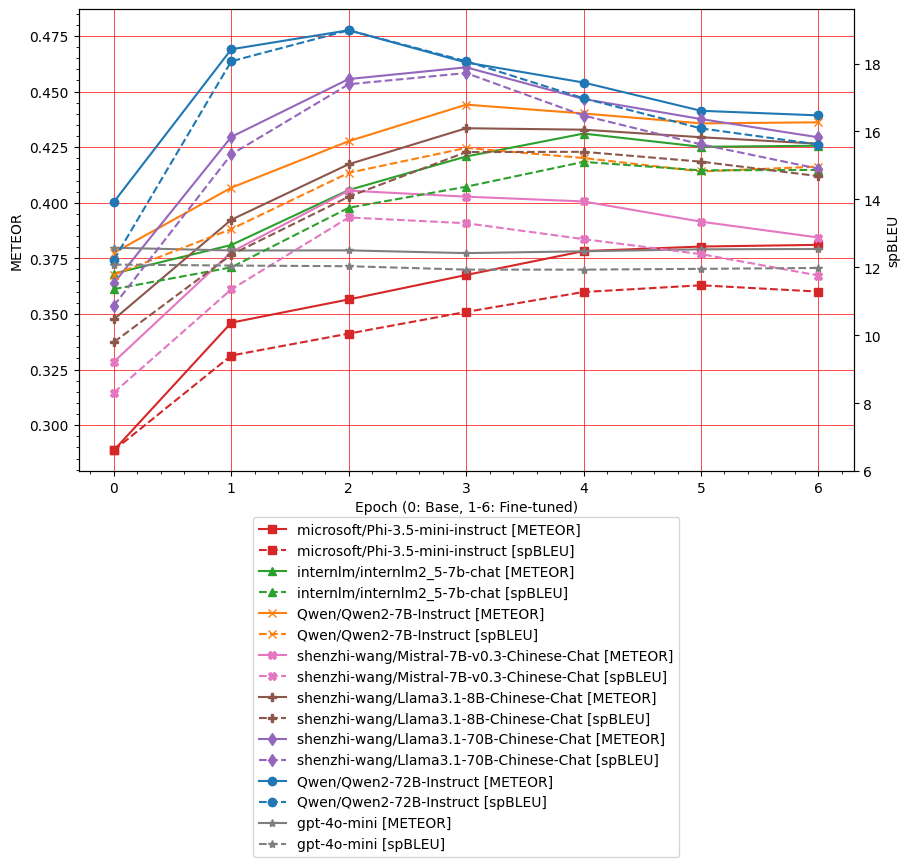

In [70]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "spbleu"],
    ["METEOR", "spBLEU"],
)

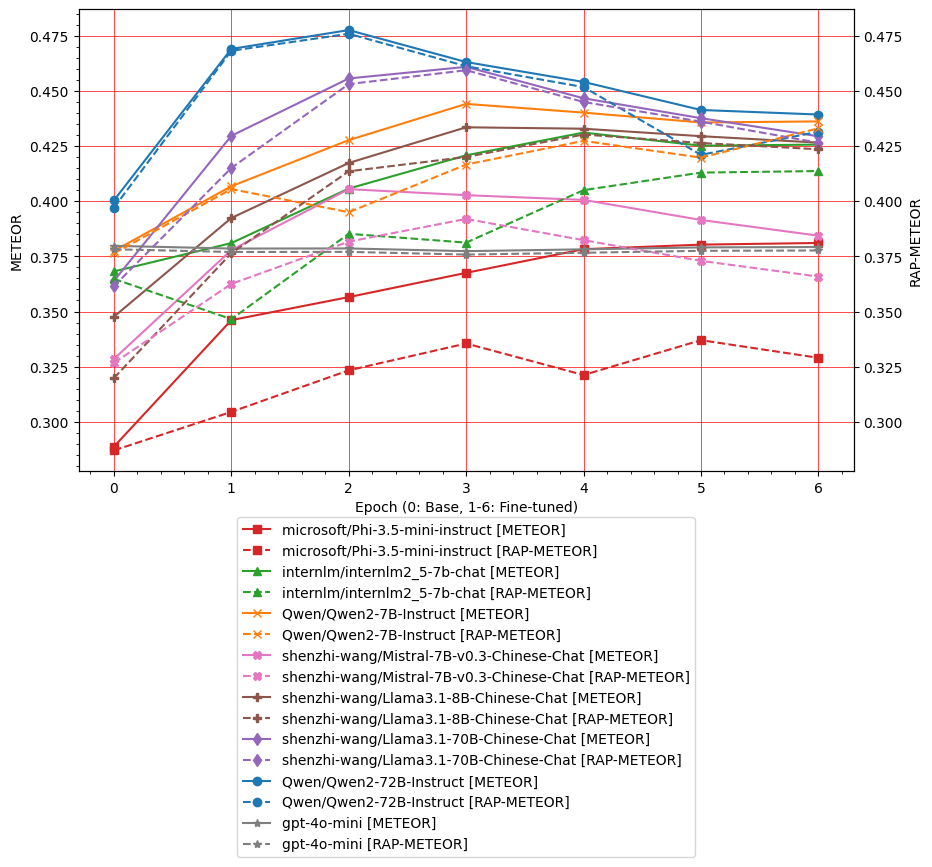

In [71]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "rap"],
    ["METEOR", "RAP-METEOR"],
    sync_y_axis=True,
)

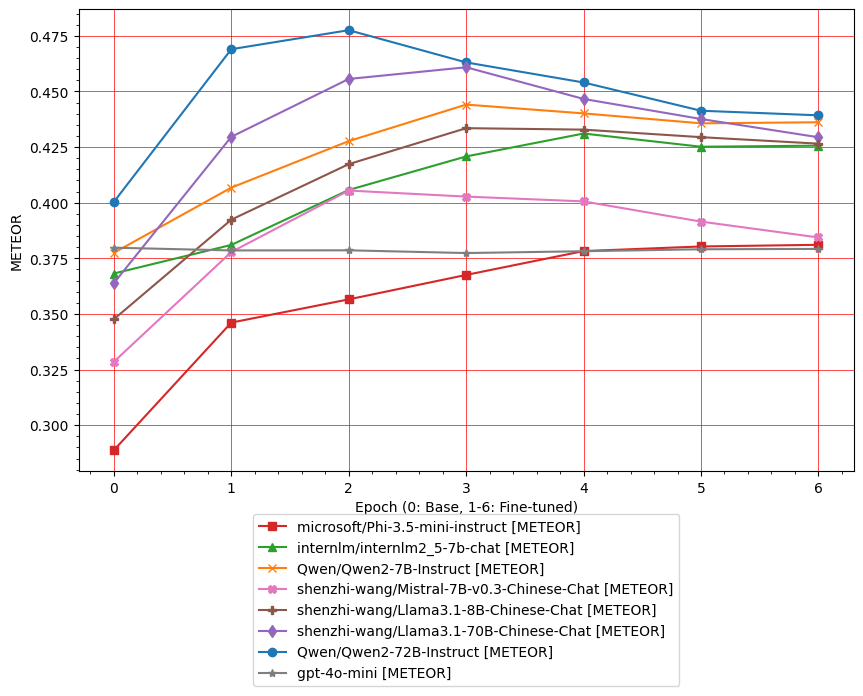

In [72]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor"],
    ["METEOR"],
)

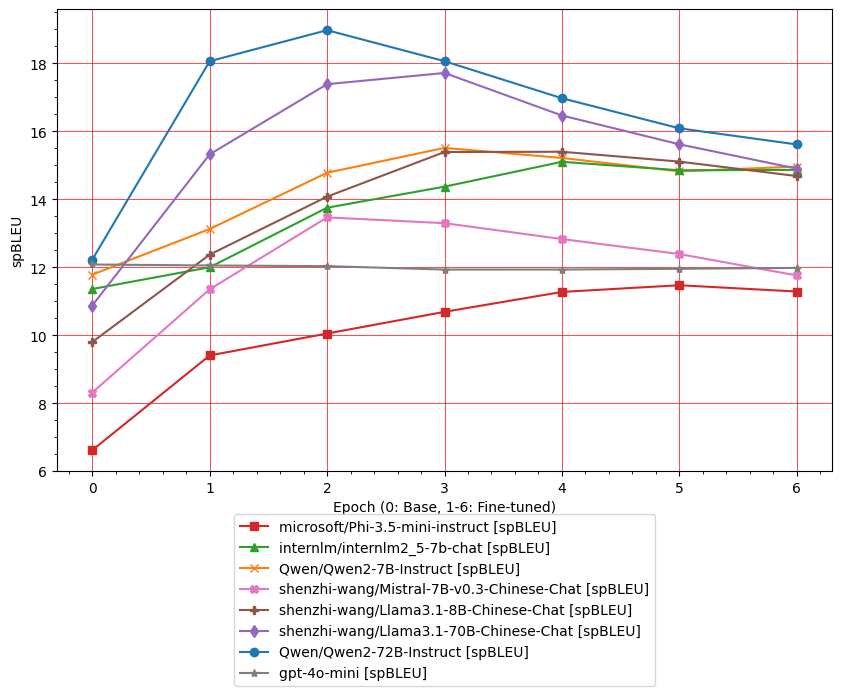

In [73]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["spbleu"],
    ["spBLEU"],
)

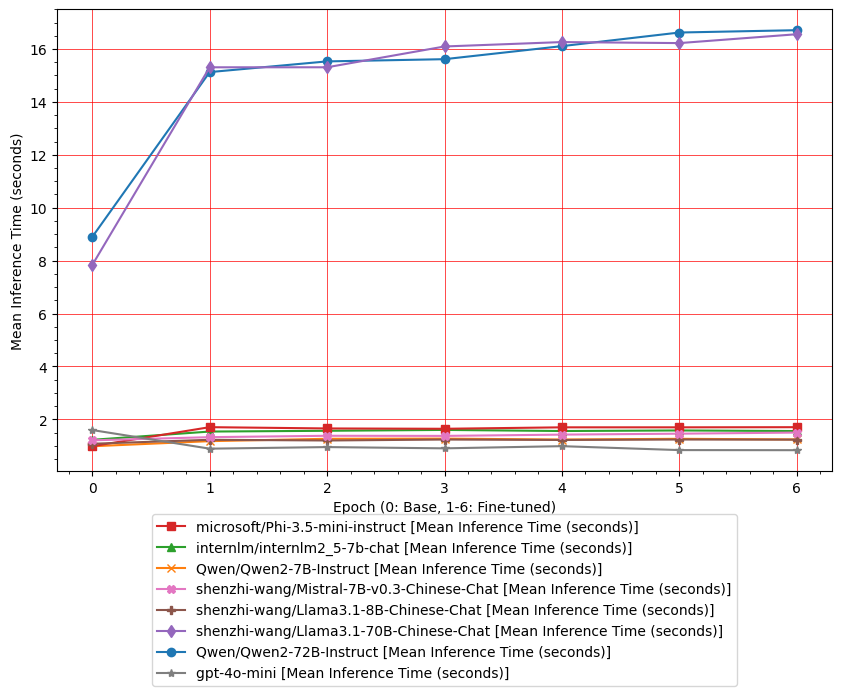

In [74]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["eval_time"],
    ["Mean Inference Time (seconds)"],
    # log_scales=[True],
)

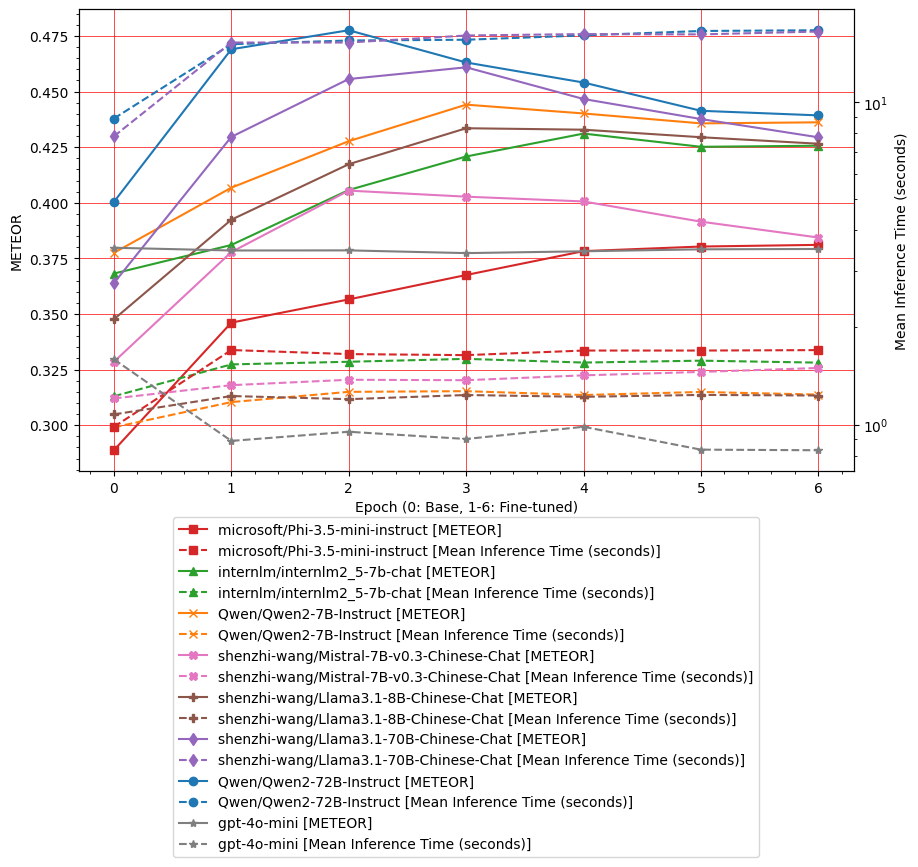

In [75]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "eval_time"],
    ["METEOR", "Mean Inference Time (seconds)"],
    log_scales=[False, True],
)

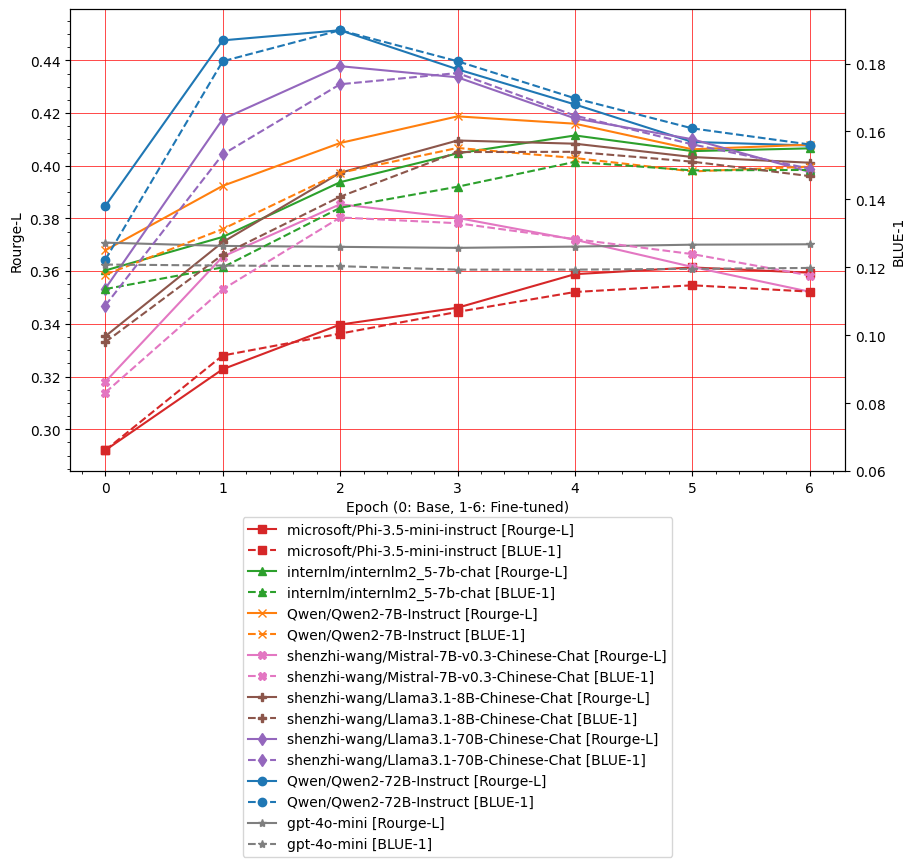

In [76]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["rouge_l", "bleu_1"],
    ["Rourge-L", "BLUE-1"],
)

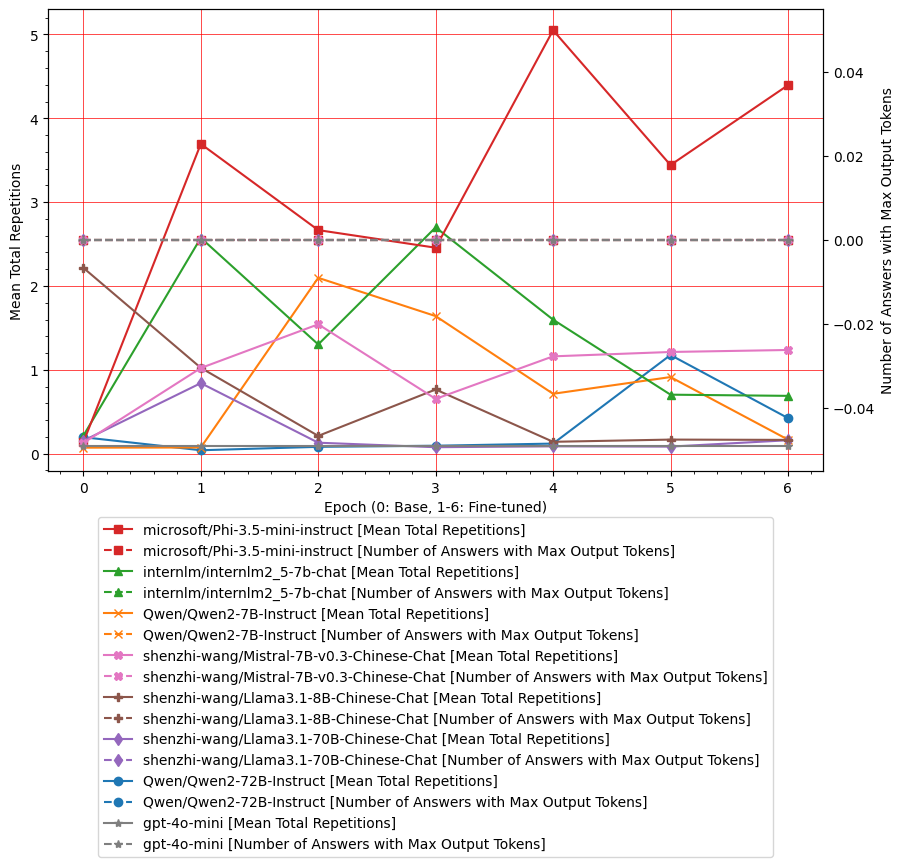

In [77]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["total_repetitions", "num_max_output_tokens"],
    ["Mean Total Repetitions", "Number of Answers with Max Output Tokens"],
)

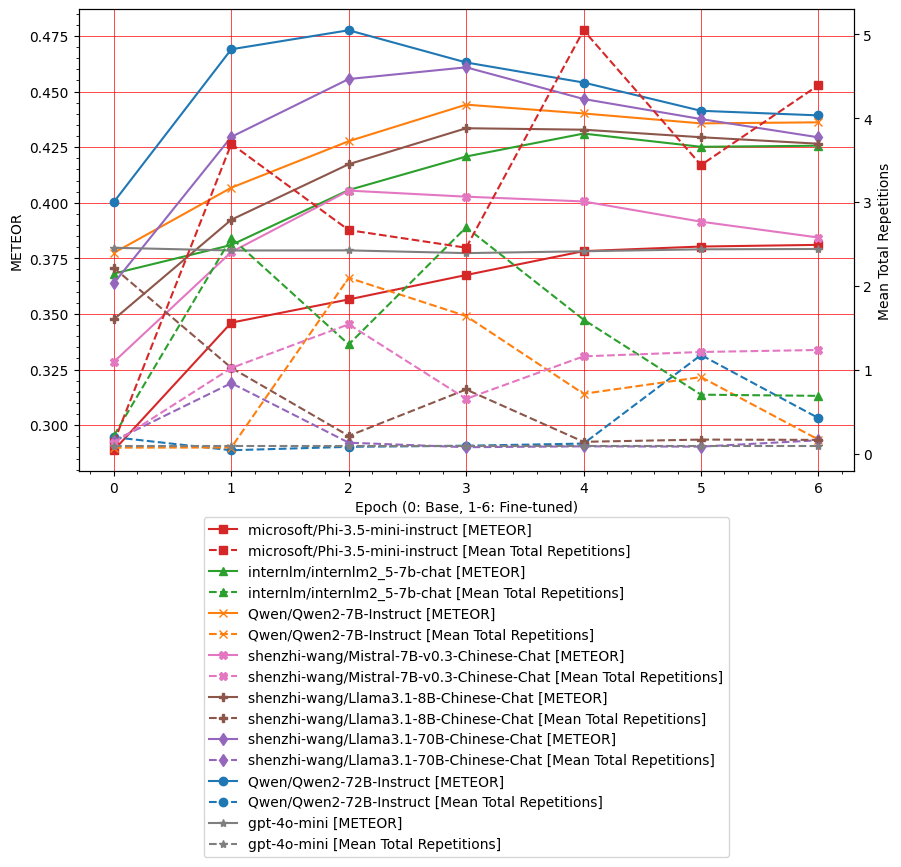

In [78]:
plot_metrics_vs_shots(
    metrics_df,
    models,
    markers,
    ["meteor", "total_repetitions"],
    ["METEOR", "Mean Total Repetitions"],
)

In [79]:
for col in result_columns:
    print(f"### Analyzing: {col}")
    analyze_translation_results(df, col, repetition_threshold=50)

### Analyzing: Qwen/Qwen2-72B-Instruct/epochs-01
*** Found 0 rows with total_repetitions > 50 for Qwen/Qwen2-72B-Instruct/epochs-01

*** Found 0 rows with output_tokens >= 300 for Qwen/Qwen2-72B-Instruct/epochs-01

*** Found 1 rows with incomplete translations for Qwen/Qwen2-72B-Instruct/epochs-01
--------------------------------------------------
chinese: 天地会的会众多是江湖豪杰，赌钱酗酒，乃是天性，向来不以为非，总舵主也就不再理会，向他凝视片刻，道：“你愿不愿拜我为师？”
--------------------------------------------------
english: Since most members of the Society came from a travelling background in which gambling and drunken brawling were accepted as normal behaviour, the Helmsman was inclined to turn a blind eye on these matters. He looked at Trinket intently for some moments as if trying to make his mind up about something. 'Would you like to be my apprentice?'
--------------------------------------------------
Qwen/Qwen2-72B-Instruct/epochs-01: The Triads were mostly made up of men who had spent their lives in the world of the江湖, and ga

In [80]:
metrics_df.to_csv(results_path.replace(".csv", "_metrics.csv"), index=False)

In [81]:
metrics_df.describe()

epochs     meteor     spbleu     bleu_1    rouge_l  ews_score  \
count  56.0000  56.000000  56.000000  56.000000  56.000000       56.0   
mean    3.0000   0.405601  13.497660   0.134977   0.386266        0.0   
std     2.0181   0.038045   2.562435   0.025624   0.033089        0.0   
min     0.0000   0.288749   6.616686   0.066167   0.292031        0.0   
25%     1.0000   0.378578  11.895707   0.118957   0.367306        0.0   
50%     3.0000   0.405585  13.383491   0.133835   0.388880        0.0   
75%     5.0000   0.434039  15.244695   0.152447   0.408740        0.0   
max     6.0000   0.477542  18.979032   0.189790   0.451435        0.0   

       repetition_score  total_repetitions        rap  \
count         56.000000          56.000000  56.000000   
mean           0.951409           0.951409   0.392095   
std            1.189408           1.189408   0.043672   
min            0.040600           0.040600   0.287066   
25%            0.095322           0.095322   0.371175   
50%            0.319506           0.319506   0.388594   
75%            1.253089           1.253089   0.424246   
max            5.050309           5.050309   0.475871   

       num_incomplete_translations  num_max_output_tokens  eval_time  
count                    56.000000                   56.0  56.000000  
mean                      9.714286                    0.0   4.703332  
std                      16.191709                    0.0   6.084052  
min                       0.000000                    0.0   0.832304  
25%                       0.000000                    0.0   1.225508  
50%                       1.000000                    0.0   1.477052  
75%                      16.250000                    0.0   3.235216  
max                      89.000000                    0.0  16.712268